Plotting overall metrics...


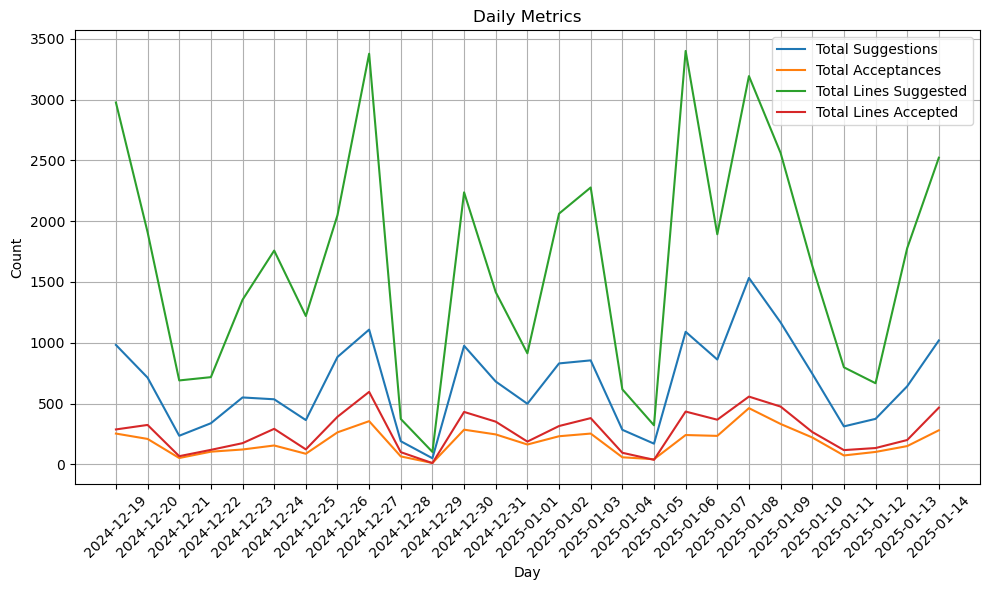

Plotting active users...


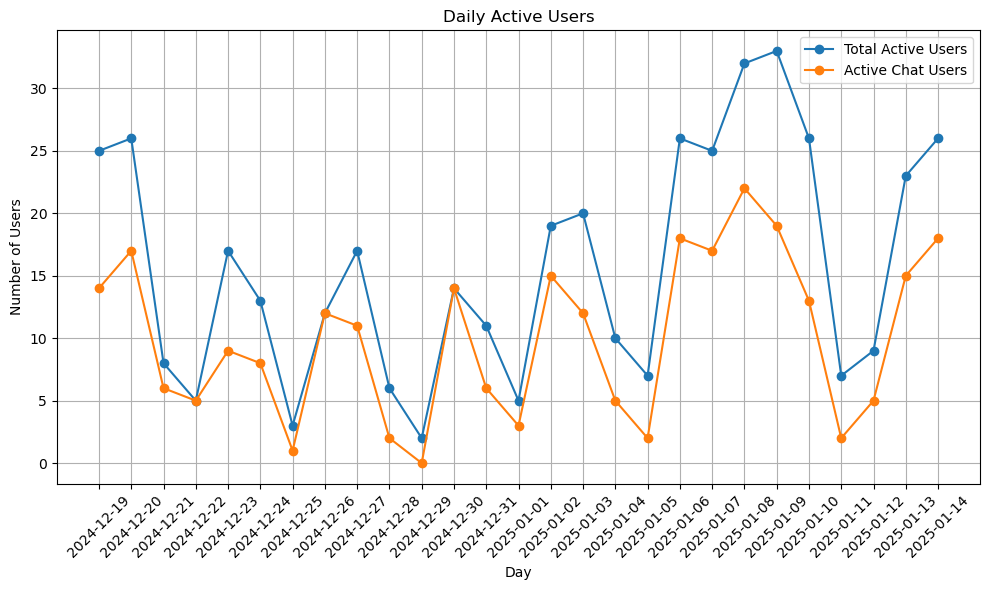

Plotting total active users...


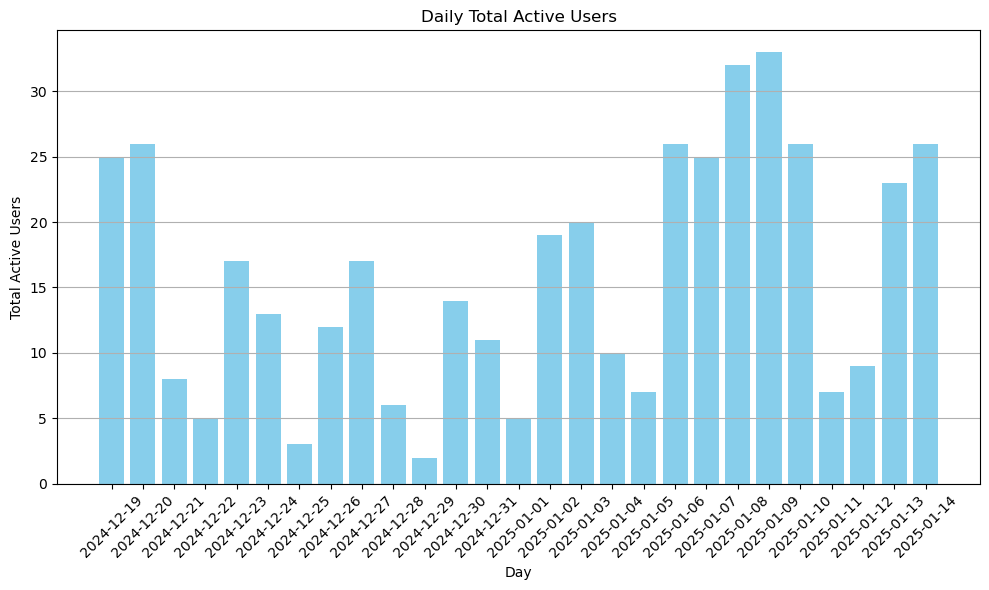

Plotting language breakdown...


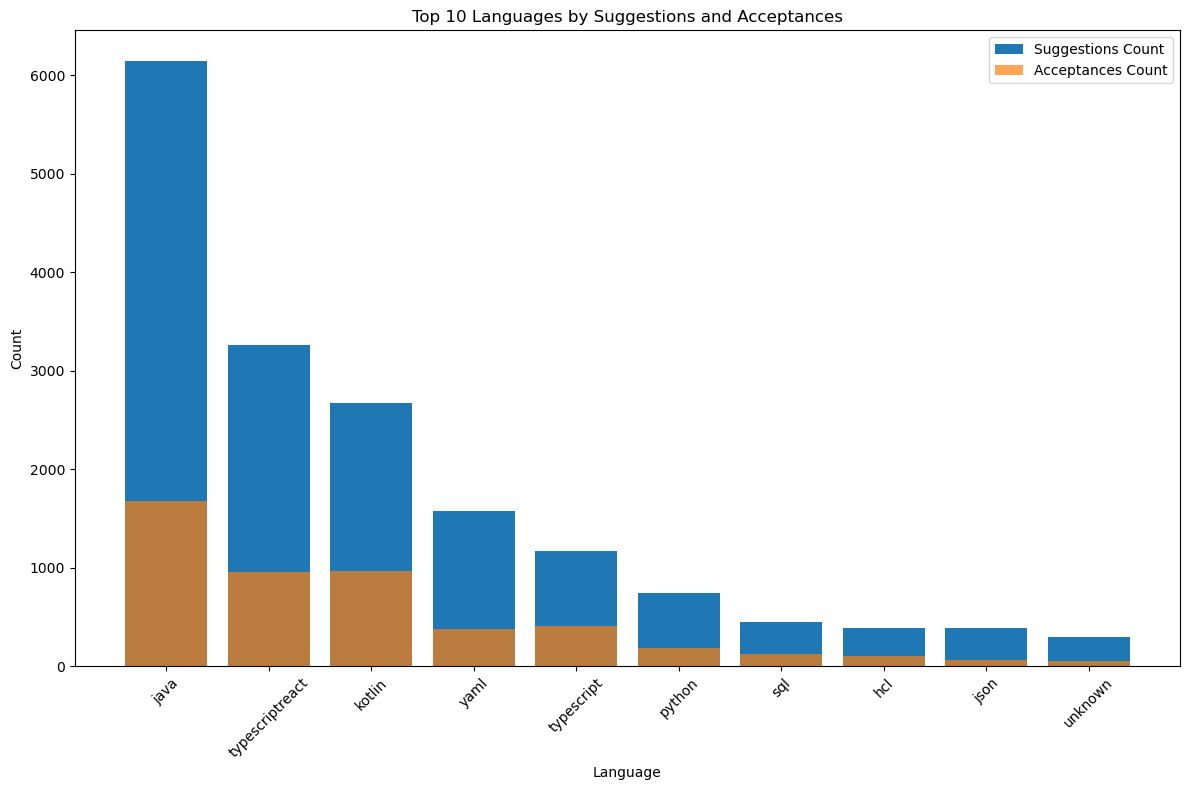

Plotting editor breakdown...


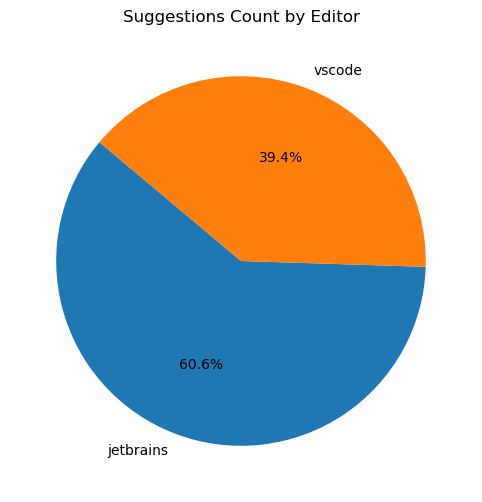

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
def load_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Process the data into a DataFrame
def process_data(data):
    main_data = []
    breakdown_data = []

    for day in data:
        day_summary = {
            'day': day['day'],
            'total_suggestions_count': day['total_suggestions_count'],
            'total_acceptances_count': day['total_acceptances_count'],
            'total_lines_suggested': day['total_lines_suggested'],
            'total_lines_accepted': day['total_lines_accepted'],
            'total_active_users': day['total_active_users'],
            'total_chat_acceptances': day['total_chat_acceptances'],
            'total_chat_turns': day['total_chat_turns'],
            'total_active_chat_users': day['total_active_chat_users']
        }
        main_data.append(day_summary)

        for breakdown in day['breakdown']:
            breakdown_data.append({
                'day': day['day'],
                **breakdown
            })

    main_df = pd.DataFrame(main_data)
    breakdown_df = pd.DataFrame(breakdown_data)

    return main_df, breakdown_df

# Plot overall daily metrics
def plot_overall_metrics(main_df):
    plt.figure(figsize=(10, 6))
    plt.plot(main_df['day'], main_df['total_suggestions_count'], label='Total Suggestions')
    plt.plot(main_df['day'], main_df['total_acceptances_count'], label='Total Acceptances')
    plt.plot(main_df['day'], main_df['total_lines_suggested'], label='Total Lines Suggested')
    plt.plot(main_df['day'], main_df['total_lines_accepted'], label='Total Lines Accepted')
    plt.xlabel('Day')
    plt.ylabel('Count')
    plt.title('Daily Metrics')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot breakdown by language

def plot_language_breakdown(breakdown_df):
    language_summary = breakdown_df.groupby('language').sum()
    language_summary = language_summary.sort_values('suggestions_count', ascending=False).head(10)

    plt.figure(figsize=(12, 8))
    plt.bar(language_summary.index, language_summary['suggestions_count'], label='Suggestions Count')
    plt.bar(language_summary.index, language_summary['acceptances_count'], label='Acceptances Count', alpha=0.7)
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.title('Top 10 Languages by Suggestions and Acceptances')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot breakdown by editor

def plot_editor_breakdown(breakdown_df):
    editor_summary = breakdown_df.groupby('editor').sum()

    plt.figure(figsize=(8, 6))
    plt.pie(
        editor_summary['suggestions_count'],
        labels=editor_summary.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title('Suggestions Count by Editor')
    plt.show()

# Plot active users metrics
def plot_active_users(main_df):
    plt.figure(figsize=(10, 6))
    plt.plot(main_df['day'], main_df['total_active_users'], label='Total Active Users', marker='o')
    plt.plot(main_df['day'], main_df['total_active_chat_users'], label='Active Chat Users', marker='o')
    plt.xlabel('Day')
    plt.ylabel('Number of Users')
    plt.title('Daily Active Users')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot total active users only
def plot_total_active_users(main_df):
    plt.figure(figsize=(10, 6))
    plt.bar(main_df['day'], main_df['total_active_users'], color='skyblue')
    plt.xlabel('Day')
    plt.ylabel('Total Active Users')
    plt.title('Daily Total Active Users')
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Load and process the data
    file_path = 'usage-2025-01-15.json'  # Replace with your file path
    data = load_data(file_path)
    main_df, breakdown_df = process_data(data)

    # Generate plots
    print("Plotting overall metrics...")
    plot_overall_metrics(main_df)

    print("Plotting active users...")
    plot_active_users(main_df)

    print("Plotting total active users...")
    plot_total_active_users(main_df)

    print("Plotting language breakdown...")
    plot_language_breakdown(breakdown_df)

    print("Plotting editor breakdown...")
    plot_editor_breakdown(breakdown_df)

# Run the notebook
if __name__ == "__main__":
    main()
